In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.core.pylabtools import figsize
# use seaborn for plot defaults
# this can be safely commented out
from scipy import stats
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import mlxtend


# use seaborn plotting defaults
import seaborn as sns; sns.set()



In [2]:
# Reading csv files
fistbump = pd.read_csv("/Users/amad/Desktop/Own IMU/fistbump_data.csv")
wave = pd.read_csv("/Users/amad/Desktop/Own IMU/wave_data.csv")

In [3]:
# Assigning labels 0 to wave and 1 to fistbump
wave["gesture"] = "0"
wave.to_csv("wave_data.csv", index=False)
fistbump["gesture"] = "1"
wave.to_csv("fistbump_data.csv", index=False)

In [4]:
wave

,ax,ay,az,gx,gy,gz,Sample #,gesture
0,0.562,-1.638,-0.650,95.581,-6.287,-65.979,1,0
1,0.519,-1.707,-0.727,96.680,-20.996,-34.546,1,0
2,0.503,-1.709,-0.808,91.980,-38.696,0.000,1,0
3,0.475,-1.624,-0.852,84.534,-60.242,36.804,1,0
4,0.429,-1.518,-0.767,77.454,-86.975,71.777,1,0
...,...,...,...,...,...,...,...,...
5945,0.623,-0.945,-0.253,-0.916,18.555,-11.658,50,0
5946,0.630,-0.940,-0.250,-4.578,8.728,-0.610,50,0
5947,0.656,-0.938,-0.206,-12.878,1.343,15.015,50,0
5948,0.695,-0.910,-0.188,-21.301,-2.869,28.748,50,0


In [5]:
fistbump

,ax,ay,az,gx,gy,gz,Sample #,gesture
0,3.280,-0.822,4.000,88.684,-71.655,122.192,1,1
1,1.528,-0.257,2.544,-7.080,-31.433,173.645,1,1
2,0.421,-0.513,0.813,18.677,62.317,77.026,1,1
3,0.801,0.178,0.850,68.298,77.942,22.461,1,1
4,1.108,0.139,1.143,101.868,66.223,-15.625,1,1
...,...,...,...,...,...,...,...,...
5945,0.909,0.136,0.227,-16.235,-16.541,13.184,50,1
5946,0.903,0.141,0.224,-15.442,-15.137,11.414,50,1
5947,0.896,0.145,0.223,-13.184,-13.367,8.179,50,1
5948,0.894,0.127,0.230,-10.559,-11.658,4.578,50,1


# Merging Both csv files and randomizing Labels

In [6]:
frames = [wave, fistbump]
mged = pd.concat(frames)

indx = np.arange(len(mged))
rndmged = np.random.permutation(indx)


rndmged=mged.sample(frac=1).reset_index(drop=True)

rndmged.to_csv('/Users/amad/Desktop/495/gesture.csv', index=False)

# Creating a New CSV file with both gestures

In [7]:
gesture = pd.read_csv("/Users/amad/Desktop/495/gesture.csv")

In [8]:
gesture.shape

(11900, 8)

In [9]:
# droping labels and sample number and assigning it to X
X = gesture.drop(['Sample #', 'gesture'], axis=1)
# Assigning Labels to y
y = gesture['gesture']


In [10]:
X

,ax,ay,az,gx,gy,gz
0,0.646,1.008,0.419,84.167,38.269,63.171
1,0.778,-0.556,0.197,3.479,9.094,-1.465
2,0.738,-0.560,0.090,-22.278,39.490,-41.443
3,0.929,-0.117,-0.242,-5.676,0.488,6.531
4,0.974,-0.212,-0.100,-18.677,-12.695,-2.686
...,...,...,...,...,...,...
11895,0.794,-0.595,0.396,38.025,-19.165,67.078
11896,1.043,-0.277,-0.218,-25.696,-50.354,-45.715
11897,0.946,-0.091,-0.155,-13.245,2.563,9.216
11898,0.322,0.805,0.759,-82.458,-101.624,-295.715


In [11]:
y

0        0
1        0
2        0
3        1
4        1
        ..
11895    0
11896    1
11897    1
11898    0
11899    0
Name: gesture, Length: 11900, dtype: int64

In [12]:
# Splitting the dataset into test and training datasets (80:20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9520, 6)
(9520,)
(2380, 6)
(2380,)


In [13]:
X_train

,ax,ay,az,gx,gy,gz
1844,0.193,1.394,0.043,-62.134,-30.701,-203.979
5398,0.963,-0.175,0.061,-28.564,-15.930,-1.343
1909,0.091,0.922,0.774,-92.590,-51.086,-214.783
9288,1.007,-0.059,-0.072,-10.620,-44.373,-8.118
8179,0.162,1.134,0.234,12.207,35.889,11.047
...,...,...,...,...,...,...
3046,0.961,-0.205,-0.070,-43.701,-5.432,3.540
9917,0.193,0.767,0.735,-85.205,-8.423,-160.950
4079,1.112,-0.414,-0.019,-40.466,-13.123,24.658
2254,0.408,-0.820,-0.179,162.537,-119.751,-14.282


In [14]:
# FItting the model Random Forest and predicting on test data
clf = RandomForestClassifier(n_estimators=2, random_state=50)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [15]:
# Probability of prediction
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.9819327731092437

In [16]:
# Precision, Recall and F1 Score
print("Classification report for classifier {clf}:")
print(metrics.classification_report(y_test, predicted))

Classification report for classifier {clf}:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1204
           1       0.99      0.97      0.98      1176

    accuracy                           0.98      2380
   macro avg       0.98      0.98      0.98      2380
weighted avg       0.98      0.98      0.98      2380



In [17]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix(y_test, predicted))

[[1198    6]
 [  37 1139]]


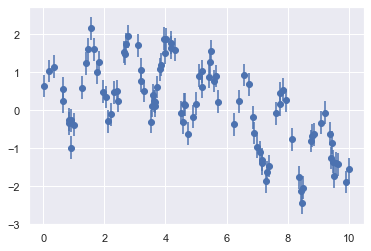

In [18]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');


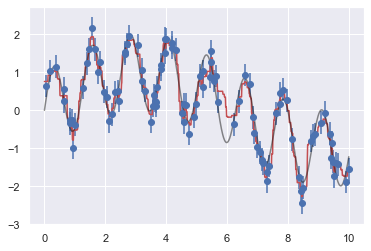

In [19]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0, 10, 1000)
yfit = RandomForestRegressor(100).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [20]:
from micromlgen import port

with open("./models/Own_IMU_Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier"))

In [21]:
!cat ./models/Own_IMU_Classifier.h


#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class Classifier {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[4] <= 7.6595001220703125) {
                            if (x[1] <= 0.35100001096725464) {
                                if (x[1] <= -0.3634999990463257) {
                                    if (x[1] <= -0.46699999272823334) {
                                        if (x[2] <= 1.4339999556541443) {
                                            if (x[1] <= -2.205999970436096) {
                                                if (x[3] <= 43.029998779296875) {
                                                    votes[0] += 1;
                                                }

    

In [22]:
!du -sh ./models/Own_IMU_Classifier.h


 76K	./models/Own_IMU_Classifier.h
